# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [1]:
# student 1: Dekel 4352
# student 2:

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA

In [3]:
#load the datasets
train_df = pd.read_csv('wine_train.csv')
test_df = pd.read_csv('wine_test.csv')

In [4]:
#first 5 rows of the train data set
train_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0,1
1,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0,2
2,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
3,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0,1
4,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0,2


In [5]:
#first 5 rows of the test data set
test_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.78,2.76,2.30,22.0,90.0,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615.0,2
1,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035.0,0
2,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0,2
3,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0,1
4,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2


In [6]:
train_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,12.997254,2.297746,2.361690,19.419718,99.943662,2.315986,2.063592,0.346690,1.561901,5.030211,0.958563,2.638873,742.457746,0.922535
std,0.789931,1.093317,0.283231,3.354815,13.683751,0.639469,1.005302,0.117562,0.540979,2.239593,0.219631,0.718083,317.250905,0.772524
min,11.410000,0.740000,1.360000,10.600000,78.000000,0.980000,0.340000,0.130000,0.420000,1.280000,0.480000,1.290000,278.000000,0.000000
25%,12.370000,1.592500,2.222500,17.250000,88.000000,1.782500,1.257500,0.260000,1.250000,3.180000,0.800000,1.922500,500.000000,0.000000
50%,13.050000,1.865000,2.360000,19.250000,98.000000,2.380000,2.155000,0.320000,1.505000,4.800000,0.960000,2.815000,660.000000,1.000000
75%,13.637500,3.020000,2.557500,21.375000,108.000000,2.822500,2.887500,0.430000,1.870000,6.182500,1.120000,3.197500,957.500000,2.000000
max,14.750000,5.650000,3.230000,30.000000,151.000000,3.880000,5.080000,0.630000,3.580000,11.750000,1.450000,4.000000,1680.000000,2.000000


In [7]:
test_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,13.013889,2.488611,2.385556,19.791667,98.944444,2.212778,1.893889,0.421667,1.705278,5.168056,0.953056,2.504444,764.388889,1.000000
std,0.904962,1.210778,0.238716,3.308550,16.626905,0.569845,0.974970,0.134302,0.678846,2.637680,0.264303,0.676096,309.252950,0.792825
min,11.030000,0.990000,1.950000,14.000000,70.000000,1.350000,0.470000,0.200000,0.410000,1.740000,0.560000,1.270000,315.000000,0.000000
25%,12.320000,1.670000,2.207500,16.950000,89.000000,1.725000,0.897500,0.290000,1.297500,3.292500,0.722500,1.990000,520.000000,0.000000
50%,13.110000,1.900000,2.310000,20.000000,96.000000,2.250000,1.940000,0.425000,1.690000,4.475000,0.975000,2.600000,680.000000,1.000000
75%,13.757500,3.202500,2.560000,22.000000,102.250000,2.755000,2.765000,0.530000,2.042500,6.337500,1.092500,2.932500,1001.250000,2.000000
max,14.830000,5.800000,2.920000,28.500000,162.000000,3.100000,3.400000,0.660000,3.280000,13.000000,1.710000,3.920000,1510.000000,2.000000


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       142 non-null    float64
 1   malic_acid                    142 non-null    float64
 2   ash                           142 non-null    float64
 3   alcalinity_of_ash             142 non-null    float64
 4   magnesium                     142 non-null    float64
 5   total_phenols                 142 non-null    float64
 6   flavanoids                    142 non-null    float64
 7   nonflavanoid_phenols          142 non-null    float64
 8   proanthocyanins               142 non-null    float64
 9   color_intensity               142 non-null    float64
 10  hue                           142 non-null    float64
 11  od280/od315_of_diluted_wines  142 non-null    float64
 12  proline                       142 non-null    float64
 13  targe

In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       36 non-null     float64
 1   malic_acid                    36 non-null     float64
 2   ash                           36 non-null     float64
 3   alcalinity_of_ash             36 non-null     float64
 4   magnesium                     36 non-null     float64
 5   total_phenols                 36 non-null     float64
 6   flavanoids                    36 non-null     float64
 7   nonflavanoid_phenols          36 non-null     float64
 8   proanthocyanins               36 non-null     float64
 9   color_intensity               36 non-null     float64
 10  hue                           36 non-null     float64
 11  od280/od315_of_diluted_wines  36 non-null     float64
 12  proline                       36 non-null     float64
 13  target 

In [10]:
#check if there are missing values

print("\nMissing Values in Train Dataset:")
print(train_df.isnull().sum())

print("\nMissing Values in Test Dataset:")
print(test_df.isnull().sum())


Missing Values in Train Dataset:
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

Missing Values in Test Dataset:
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
ta

In [11]:
# Check for duplicate rows in the train dataset

print("duplicate rows in train dataset")
print(train_df.duplicated().sum())

print("\nduplicate rows in test dataset")
print(test_df.duplicated().sum())

duplicate rows in train dataset
0

duplicate rows in test dataset
0


In [12]:
# Print the distribution of the target column in the train dataset
print(train_df['target'].value_counts())

1    57
0    48
2    37
Name: target, dtype: int64


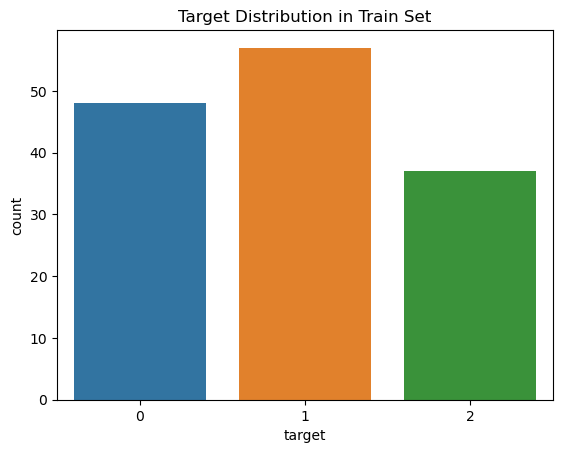

In [13]:
# Visualize the distribution of target 

plt.figure()
sns.countplot(x='target', data=train_df)
plt.title('Target Distribution in Train Set')
plt.show()

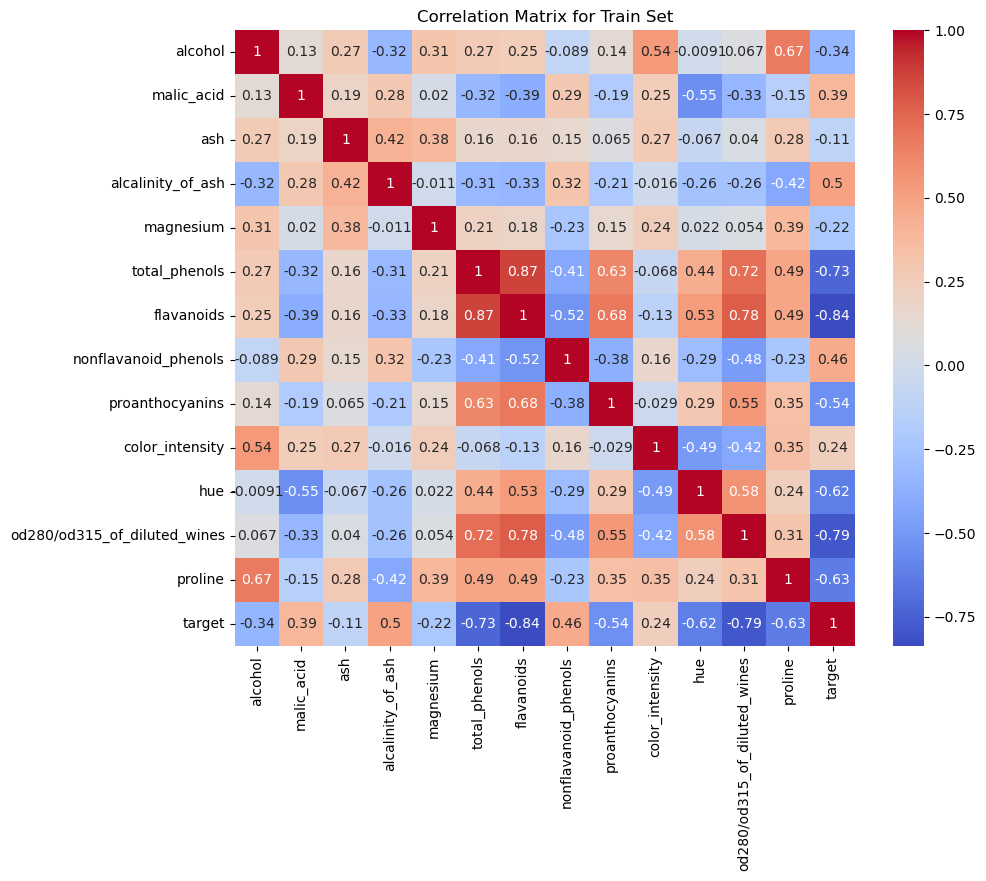

In [14]:
# Plot the correlation matrix to visualize relationships between features
plt.figure(figsize=(10, 8))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Train Set')
plt.show()

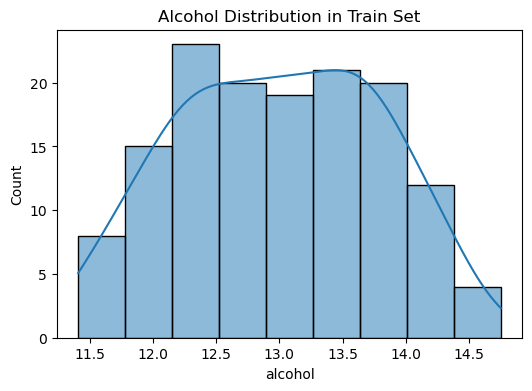

In [15]:
# Plot the distribution of the 'alcohol' feature with a histogram and KDE

plt.figure(figsize=(6, 4))
sns.histplot(train_df['alcohol'], kde=True)
plt.title('Alcohol Distribution in Train Set')
plt.show()

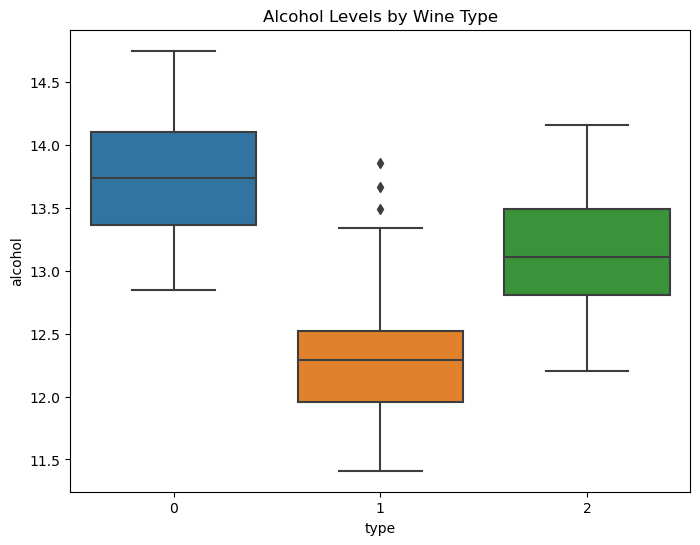

In [16]:
# Boxplot to visualize alcohol levels by wine type
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='alcohol', data=train_df)
plt.title('Alcohol Levels by Wine Type')
plt.xlabel('type')
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

In [17]:
#standart scaler normalization
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(train_df.drop('target', axis=1))

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(test_df.drop('target', axis=1))


# Separate the target labels from the features for both training and test sets
y_train = train_df['target']
y_test = test_df['target']



In [18]:
# הגדרת הפרמטרים עבור כל מודל


# Parameter grid for RandomForestClassifier
# 'n_estimators' defines the number of trees in the forest
# 'max_depth' defines the maximum depth of each tree
param_grid_rf = {
    'n_estimators': [50,100,150, 200, 250, 300],
    'max_depth': [None, 10, 20, 30]
}

# Parameter grid for Support Vector Machine (SVM)
# 'C' is the regularization parameter
# 'kernel' specifies the kernel type to be used in the algorithm
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf','poly']
}


# Parameter grid for KNeighborsClassifier
# 'n_neighbors' defines the number of neighbors to use
# 'metric' specifies the distance metric to be used
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10,12,15,17,20],
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}


# Parameter grid for DecisionTreeClassifier
# 'criterion' specifies the function to measure the quality of a split
# 'max_depth' defines the maximum depth of the tree
# 'min_samples_split' is the minimum number of samples required to split an internal node
# 'min_samples_leaf' is the minimum number of samples required to be at a leaf node
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [19]:

# Model initializing

# Initialize the RandomForestClassifier
rf = RandomForestClassifier()

# Initialize the Support Vector Classifier (SVC)
svm = SVC()

# Initialize the K-Nearest Neighbors Classifier (KNN)
knn = KNeighborsClassifier()

# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier()

In [20]:
# Perform Grid Search with 5-fold Cross Validation
# Evaluate model performance using the f1_macro scoring

# Perform Grid Search with 5-fold Cross Validation for RandomForestClassifier
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1_macro')
grid_search_rf.fit(X_train_scaled, y_train)

# Perform Grid Search with 5-fold Cross Validation for SVC
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='f1_macro')
grid_search_svm.fit(X_train_scaled, y_train)

# Perform Grid Search with 5-fold Cross Validation for KNeighborsClassifier
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='f1_macro')
grid_search_knn.fit(X_train_scaled, y_train)

# Perform Grid Search with 5-fold Cross Validation for DecisionTreeClassifier
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='f1_macro')
grid_search_dt.fit(X_train_scaled, y_train)



C:\Users\dekel\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\dekel\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1_macro')

In [21]:
#Random forest results
print("Best parameters for Random Forest:")
print(grid_search_rf.best_params_)
print("Best F1-macro score for Random Forest:")
print(grid_search_rf.best_score_)

#SVM results
print("\nBest parameters for SVM:")
print(grid_search_svm.best_params_)
print("Best F1-macro score for SVM:")
print(grid_search_svm.best_score_)

#KNN results
print("\nBest parameters for KNN:")
print(grid_search_knn.best_params_)
print("Best F1-macro score for KNN:")
print(grid_search_knn.best_score_)

#Decisions Tree results
print("\nBest parameters for Decision Tree:")
print(grid_search_dt.best_params_)
print("Best F1-macro score for Decision Tree:")
print(grid_search_dt.best_score_)

Best parameters for Random Forest:
{'max_depth': 20, 'n_estimators': 50}
Best F1-macro score for Random Forest:
0.9863203463203462

Best parameters for SVM:
{'C': 0.1, 'kernel': 'linear'}
Best F1-macro score for SVM:
0.9787114845938376

Best parameters for KNN:
{'metric': 'euclidean', 'n_neighbors': 20}
Best F1-macro score for KNN:
0.9722848788638263

Best parameters for Decision Tree:
{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best F1-macro score for Decision Tree:
0.9520955030222765


In [22]:
# Create a summary table of the model results

results = {
    'Model': ['Random Forest', 'SVM', 'KNN', 'Decision Tree'],
    'Best Params': [
        grid_search_rf.best_params_,
        grid_search_svm.best_params_,
        grid_search_knn.best_params_,
        grid_search_dt.best_params_
    ],
    'Best F1-macro': [
        grid_search_rf.best_score_,
        grid_search_svm.best_score_,
        grid_search_knn.best_score_,
        grid_search_dt.best_score_
    ]
}

# Convert the results dictionary into a DataFrame
results_df = pd.DataFrame(results)

print("\nSummary of Results:")
results_df


Summary of Results:


,Model,Best Params,Best F1-macro
0,Random Forest,"{'max_depth': 20, 'n_estimators': 50}",0.986320
1,SVM,"{'C': 0.1, 'kernel': 'linear'}",0.978711
2,KNN,"{'metric': 'euclidean', 'n_neighbors': 20}",0.972285
3,Decision Tree,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.952096


 # feature engineering

In [23]:
# Create copies of the original datasets for feature engineering
train_df_feature_engineer = train_df.copy()
test_df_feature_engineer = test_df.copy()

# Create new features based on correlation observations

# Feature 1: Ratio of flavanoids to total phenols
# This captures the relationship between these two highly correlated features
train_df_feature_engineer['flavanoids_to_total_phenols'] = train_df_feature_engineer['flavanoids'] / (train_df_feature_engineer['total_phenols'] + 1)
test_df_feature_engineer['flavanoids_to_total_phenols'] = test_df_feature_engineer['flavanoids'] / (test_df_feature_engineer['total_phenols'] + 1)

# Feature 2: Interaction term between alcohol and proline
# This captures the interaction effect between these two features
train_df_feature_engineer['alcohol_proline_interaction'] = train_df_feature_engineer['alcohol'] * train_df_feature_engineer['proline']
test_df_feature_engineer['alcohol_proline_interaction'] = test_df_feature_engineer['alcohol'] * test_df_feature_engineer['proline']

# Feature 3: Ratio of alcohol to proline
# This ratio might provide additional insights into the relationship between these features
train_df_feature_engineer['alcohol_to_proline'] = train_df_feature_engineer['alcohol'] / (train_df_feature_engineer['proline'] + 1)
test_df_feature_engineer['alcohol_to_proline'] = test_df_feature_engineer['alcohol'] / (test_df_feature_engineer['proline'] + 1)

# Feature 4: Interaction term between color intensity and hue
# This captures the combined effect of these two features
train_df_feature_engineer['color_intensity_hue'] = train_df_feature_engineer['color_intensity'] * train_df_feature_engineer['hue']
test_df_feature_engineer['color_intensity_hue'] = test_df_feature_engineer['color_intensity'] * test_df_feature_engineer['hue']

# Display the first few rows of the modified training dataset
train_df_feature_engineer.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,flavanoids_to_total_phenols,alcohol_proline_interaction,alcohol_to_proline,color_intensity_hue
0,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0,1,0.576923,5798.4,0.025114,2.5920
1,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0,2,0.329412,10185.0,0.018083,6.4084
2,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1,0.191275,6432.4,0.023743,2.0475
3,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0,1,0.468571,4905.3,0.028413,1.9364
4,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0,2,0.220000,10922.8,0.015836,2.4000


In [24]:
# הגדרת המודלים
##rf = RandomForestClassifier()
##svm = SVC()
##knn = KNeighborsClassifier()
##dt = DecisionTreeClassifier()

In [25]:
#standart scaler normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_df_feature_engineer.drop('target', axis=1))
X_test_scaled = scaler.transform(test_df_feature_engineer.drop('target', axis=1))

# Preserve the target labels
y_train = train_df_feature_engineer['target']
y_test = test_df_feature_engineer['target']


# Perform Grid Search with 5-fold Cross Validation for Random Forest
grid_search_rf_with_FE = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1_macro')
grid_search_rf_with_FE.fit(X_train_scaled, y_train)

# Perform Grid Search with 5-fold Cross Validation for SVM
grid_search_svm_with_FE = GridSearchCV(svm, param_grid_svm, cv=5, scoring='f1_macro')
grid_search_svm_with_FE.fit(X_train_scaled, y_train)

# Perform Grid Search with 5-fold Cross Validation for KNN
grid_search_knn_with_FE = GridSearchCV(knn, param_grid_knn, cv=5, scoring='f1_macro')
grid_search_knn_with_FE.fit(X_train_scaled, y_train)

# Perform Grid Search with 5-fold Cross Validation for Decision Tree
grid_search_dt_with_FE = GridSearchCV(dt, param_grid_dt, cv=5, scoring='f1_macro')
grid_search_dt_with_FE.fit(X_train_scaled, y_train)


# יצירת טבלה מסכמת של תוצאות המודלים
results = {
    'Model': ['Random Forest', 'SVM', 'KNN', 'Decision Tree'],
    'Best Params': [
        grid_search_rf_with_FE.best_params_,
        grid_search_svm_with_FE.best_params_,
        grid_search_knn_with_FE.best_params_,
        grid_search_dt_with_FE.best_params_
    ],
    'Best F1-macro': [
        grid_search_rf_with_FE.best_score_,
        grid_search_svm_with_FE.best_score_,
        grid_search_knn_with_FE.best_score_,
        grid_search_dt_with_FE.best_score_
    ]
}

results_df_with_FE = pd.DataFrame(results)

C:\Users\dekel\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\dekel\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [26]:
print("\nSummary of Results df without new features:")
results_df


Summary of Results df without new features:


,Model,Best Params,Best F1-macro
0,Random Forest,"{'max_depth': 20, 'n_estimators': 50}",0.986320
1,SVM,"{'C': 0.1, 'kernel': 'linear'}",0.978711
2,KNN,"{'metric': 'euclidean', 'n_neighbors': 20}",0.972285
3,Decision Tree,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.952096


In [27]:
print("\nSummary of Results df with new features:")
results_df_with_FE


Summary of Results df with new features:


,Model,Best Params,Best F1-macro
0,Random Forest,"{'max_depth': None, 'n_estimators': 50}",0.987778
1,SVM,"{'C': 1, 'kernel': 'rbf'}",0.984630
2,KNN,"{'metric': 'manhattan', 'n_neighbors': 15}",0.965602
3,Decision Tree,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.938429


Despite the introduction of new features, there was no significant change in model performance; while some models showed minor improvements, others experienced slight declines, indicating that the new features did not substantially enhance the overall effectiveness of the models.

In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_df.drop('target', axis=1))
X_test_scaled = scaler.transform(test_df.drop('target', axis=1))

# Apply PCA
pca = PCA(n_components=5)  # Number of components can be adjusted
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Create DataFrames for the new PCA features
pca_columns = [f'PC{i+1}' for i in range(X_train_pca.shape[1])]
X_train_pca_df = pd.DataFrame(X_train_pca, columns=pca_columns)
X_test_pca_df = pd.DataFrame(X_test_pca, columns=pca_columns)

# Combine with original features (excluding target)
X_train_final = pd.concat([X_train_pca_df, train_df[['target']]], axis=1)
X_test_final = pd.concat([X_test_pca_df, test_df[['target']]], axis=1)


In [ ]:
# הגדרת המודלים
##rf = RandomForestClassifier()
##svm = SVC()
##knn = KNeighborsClassifier()
##dt = DecisionTreeClassifier()

In [29]:
# Feature matrices and target vectors after PCA
X_train_scaled = X_train_final.drop('target', axis=1)
X_test_scaled = X_test_final.drop('target', axis=1)

# Keep the target variable separate
y_train = X_train_final['target']
y_test = X_test_final['target']

# Grid Search with 5-fold Cross Validation for Random Forest
grid_search_rf_with_PCA = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1_macro')
grid_search_rf_with_PCA.fit(X_train_scaled, y_train)

# Grid Search with 5-fold Cross Validation for SVM
grid_search_svm_with_PCA = GridSearchCV(svm, param_grid_svm, cv=5, scoring='f1_macro')
grid_search_svm_with_PCA.fit(X_train_scaled, y_train)

# Grid Search with 5-fold Cross Validation for KNN
grid_search_knn_with_PCA = GridSearchCV(knn, param_grid_knn, cv=5, scoring='f1_macro')
grid_search_knn_with_PCA.fit(X_train_scaled, y_train)

# Grid Search with 5-fold Cross Validation for Decision Tree
grid_search_dt_with_PCA = GridSearchCV(dt, param_grid_dt, cv=5, scoring='f1_macro')
grid_search_dt_with_PCA.fit(X_train_scaled, y_train)


# Summary of Results
results = {
    'Model': ['Random Forest', 'SVM', 'KNN', 'Decision Tree'],
    'Best Params': [
        grid_search_rf_with_PCA.best_params_,
        grid_search_svm_with_PCA.best_params_,
        grid_search_knn_with_PCA.best_params_,
        grid_search_dt_with_PCA.best_params_
    ],
    'Best F1-macro': [
        grid_search_rf_with_PCA.best_score_,
        grid_search_svm_with_PCA.best_score_,
        grid_search_knn_with_PCA.best_score_,
        grid_search_dt_with_PCA.best_score_
    ]
}


results_df_with_PCA = pd.DataFrame(results)

C:\Users\dekel\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\dekel\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\dekel\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\dekel\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

In [30]:
results_df

,Model,Best Params,Best F1-macro
0,Random Forest,"{'max_depth': 20, 'n_estimators': 50}",0.986320
1,SVM,"{'C': 0.1, 'kernel': 'linear'}",0.978711
2,KNN,"{'metric': 'euclidean', 'n_neighbors': 20}",0.972285
3,Decision Tree,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.952096


In [31]:
results_df_with_FE

,Model,Best Params,Best F1-macro
0,Random Forest,"{'max_depth': None, 'n_estimators': 50}",0.987778
1,SVM,"{'C': 1, 'kernel': 'rbf'}",0.984630
2,KNN,"{'metric': 'manhattan', 'n_neighbors': 15}",0.965602
3,Decision Tree,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.938429


In [32]:
results_df_with_PCA

,Model,Best Params,Best F1-macro
0,Random Forest,"{'max_depth': 10, 'n_estimators': 50}",0.965500
1,SVM,"{'C': 1, 'kernel': 'rbf'}",0.971121
2,KNN,"{'metric': 'chebyshev', 'n_neighbors': 12}",0.986491
3,Decision Tree,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.946258


Despite experimenting with new features and PCA, there was no significant change in model performance, so I have decided to proceed with the Random Forest model using the parameters {'max_depth': 10, 'n_estimators': 150}.

## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [33]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(train_df.drop('target', axis=1))
X_test_scaled = scaler.transform(test_df.drop('target', axis=1))

# Assign scaled features and target labels to variables
X_train = X_train_scaled
X_test = X_test_scaled
y_train = train_df["target"]
y_test = test_df["target"]

# Initialize the RandomForestClassifier with the best hyperparameters found
model = RandomForestClassifier(n_estimators=150, max_depth=10)

# Fit the RandomForest model to the scaled training data
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=150)

## Part 5 - Apply on test and show model performance estimation


In [34]:
# Predict the target values for the test set using the trained model
y_pred = model.predict(X_test)

# Evaluate the model's performance on the test set
f1_test = f1_score(y_test, y_pred, average='macro')

# Calculate the accuracy of the model on the test set
accuracy_test = accuracy_score(y_test, y_pred)

# Generate a classification report which includes precision, recall, and F1 scores for each class
classification_rep_test = classification_report(y_test, y_pred)


# Print the results
print(f"\nFinal F1-macro Score on Test Set: {f1_test}")
print(f"Accuracy on Test Set: {accuracy_test}")
print("\nClassification Report on Test Set:")
print(classification_rep_test)



Final F1-macro Score on Test Set: 1.0
Accuracy on Test Set: 1.0

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        11

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [35]:
# הצגת 5 חיזויים ראשונים
print("First 5 predictions on the test set:")
print(y_pred[:20])


First 5 predictions on the test set:
[2 0 2 1 2 1 0 1 1 1 1 0 0 2 1 2 1 0 1 1]


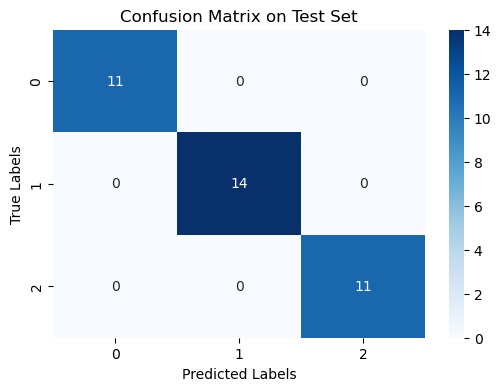

In [36]:
# הצגת טבלת confusion matrix עבור סט ה-test
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.title('Confusion Matrix on Test Set')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

The perfect score achieved is likely due to the small test dataset, which may not fully represent the diversity of the data, leading to an overly optimistic evaluation of the model's performance